# nan_euclidean_distances

sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)

dist(x,y) = sqrt(weight * sq. distance from present coordinates) where, weight = Total # of coordinates / # of present coordinates
For example, the distance between [3, na, na, 6] and [1, na, 4, 5] is:

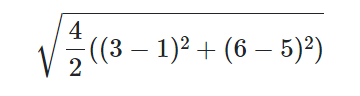

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('train.csv')[['Age','Fare','Survived','Pclass']]

In [6]:
df.head()

,Age,Fare,Survived,Pclass
0,22.0,7.2500,0,3
1,38.0,71.2833,1,1
2,26.0,7.9250,1,3
3,35.0,53.1000,1,1
4,35.0,8.0500,0,3


In [7]:
df.isnull().mean()*100

Age         19.86532
Fare         0.00000
Survived     0.00000
Pclass       0.00000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
X_train.head()

,Age,Fare,Pclass
30,40.0,27.7208,1
10,4.0,16.7000,3
873,47.0,9.0000,3
182,9.0,31.3875,3
876,20.0,9.8458,3


In [21]:
knn = KNNImputer(n_neighbors=5,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)


In [16]:
pd.DataFrame(X_train_trf,columns=X_train.columns)

,Age,Fare,Pclass
0,40.000000,27.7208,1.0
1,4.000000,16.7000,3.0
2,47.000000,9.0000,3.0
3,9.000000,31.3875,3.0
4,20.000000,9.8458,3.0
...,...,...,...
707,30.000000,8.6625,3.0
708,25.223022,8.7125,3.0
709,71.000000,49.5042,1.0
710,33.279590,221.7792,1.0


In [20]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)
y_pred = lr.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.7094972067039106

In [18]:
si = SimpleImputer()
X_train_trf1 = si.fit_transform(X_train)
X_test_trf1 = si.transform(X_test)

In [19]:
lr = LogisticRegression()

lr.fit(X_train_trf1,y_train)
y_pred = lr.predict(X_test_trf1)
accuracy_score(y_test,y_pred)

0.6927374301675978

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [44]:
numerical_features =['Age']
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5,weights='distance')),
])

In [45]:
preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_features)
])

In [46]:
clf = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])

In [47]:
from sklearn import set_config
set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(weights='distance'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [48]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {
    'preprocessor__num__imputer__n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'preprocessor__num__imputer__weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(clf,param_grid,cv = 10)

In [59]:
grid_search.fit(X_train,y_train)
print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'preprocessor__num__imputer__n_neighbors': 1, 'preprocessor__num__imputer__weights': 'uniform'}


In [60]:
print(f"Intenal CV score: {grid_search.best_score_:.3f}")

Intenal CV score: 0.631


In [61]:
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result = cv_result.sort_values('mean_test_score',ascending=False)
cv_result[['param_preprocessor__num__imputer__n_neighbors','mean_test_score']]

,param_preprocessor__num__imputer__n_neighbors,mean_test_score
0,1,0.630634
1,1,0.630634
18,10,0.630634
17,9,0.630634
16,9,0.630634
15,8,0.630634
14,8,0.630634
13,7,0.630634
12,7,0.630634
11,6,0.630634
